# Assignment 7

**Group members** :
- Max Chipani
- Jesus Gamboa
- Karen Salazar
- Paolo Gutierrez
- Luis Camarena

In [12]:
#!pip install geopandas
#!pip install matplotlib
#!pip install chardet

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import chardet

## Question 1

Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [14]:
# Getting the character format (encoding type)
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [15]:
# Getting data of people infected with dengue
data = pd.read_csv(r'../../_data/data_dengue_peru.csv', dtype={'Ubigeo': 'str'}, encoding=charenc)
data.sort_values(by=['Año', 'Ubigeo', 'Semana'], inplace=True)
data.reset_index(inplace=True)
data.head()

C:\Users\Max Lenin\AppData\Local\Temp\ipykernel_18740\1834322305.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'../../_data/data_dengue_peru.csv', dtype={'Ubigeo': 'str'}, encoding=charenc)


,index,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,92350,2015,1,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
1,92352,2015,2,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
2,92354,2015,3,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
3,92356,2015,4,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
4,92358,2015,5,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0


In [16]:
# Getting data types of dataframe
data.dtypes

index               int64
Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo             object
Casos              object
dtype: object

## Question 2

Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [17]:
# Generating the ubigeo variable
data['codgeo'] = data['Ubigeo'].astype(str).str.zfill(6)
data['codgeo'].head()

0    010101
1    010101
2    010101
3    010101
4    010101
Name: codgeo, dtype: object

In [18]:
# Generating the code of departaments
data['cod_dep'] = data['codgeo'].str[:2]
data['cod_dep'].value_counts()

cod_dep
22    27825
20    22949
16    17808
11    13727
14    11872
13    10388
06     9540
10     7632
15     7420
01     6572
25     6095
08     5194
05     4929
24     4823
12     4558
17     3710
02     3339
19     2226
21      742
07      424
18      371
Name: count, dtype: int64

In [19]:
# Generating the cod of provinces
data['cod_pro'] = data['codgeo'].str[:4]
data['cod_pro'].head()

0    0101
1    0101
2    0101
3    0101
4    0101
Name: cod_pro, dtype: object

## Question 3

Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [20]:
data['Casos'] = pd.to_numeric(data['Casos'], errors='coerce').astype('Int64') 
data.head(3)

,index,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,codgeo,cod_dep,cod_pro
0,92350,2015,1,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
1,92352,2015,2,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
2,92354,2015,3,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101


In [21]:
# Filter the DataFrame 'data' to include only the rows where the 'Año' column has the value 2021.
data_2021 = data.loc[data.Año==2021]

# Display the first 3 rows of the DataFrame 'data_2021'
data_2021.head(3)

,index,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,codgeo,cod_dep,cod_pro
147287,75264,2021,1,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
147288,75266,2021,2,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
147289,75268,2021,3,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101


In [22]:
# Group the DataFrame 'data_2021' by the 'Ubigeo' column and compute the sum of the 'Casos' column for each group.
# After aggregation, reset the index to turn the grouped columns back into regular columns, resulting in 'data_2021_anual'.
data_2021_anual = data_2021.groupby('Ubigeo')['Casos'].sum().reset_index()

# Display the DataFrame
data_2021_anual

,Ubigeo,Casos
0,010101,0
1,010201,474
2,010202,25
3,010203,38
4,010204,8
...,...,...
464,250302,26
465,250303,32
466,250304,14
467,250305,2


In [23]:
# Read the shapefile from the specified path into a GeoDataFrame 'shpf1'.
shpf1 = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp' )

# Select only the 'UBIGEO' and 'geometry' columns from the GeoDataFrame 'shpf1'.
shpf1 = shpf1[['UBIGEO', 'geometry']]

# Display the filtered GeoDataFrame 'shpf1'.
shpf1

,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.3749 -15.2499, -72.37494 -15.250..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [24]:
# Access the coordinate reference system (CRS) of the GeoDataFrame shpf1
shpf1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# Perform a left merge between the GeoDataFrame 'shpf1' and the DataFrame 'data_2021_anual',
# merging them based on the 'UBIGEO' column from 'shpf1' and the 'Ubigeo' column from 'data_2021_anual'.
# The 'how="left"' ensures that all rows from 'shpf1' will be included, even if there's no match in 'data_2021_anual'.
data_map1 = pd.merge(shpf1, data_2021_anual, how="left", left_on="UBIGEO", right_on="Ubigeo")
data_map1

,UBIGEO,geometry,Ubigeo,Casos
0,060504,"POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...",NaN,<NA>
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN,<NA>
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN,<NA>
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN,<NA>
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN,<NA>
...,...,...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN,<NA>
1870,040405,"POLYGON ((-72.3749 -15.2499, -72.37494 -15.250...",NaN,<NA>
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN,<NA>
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN,<NA>


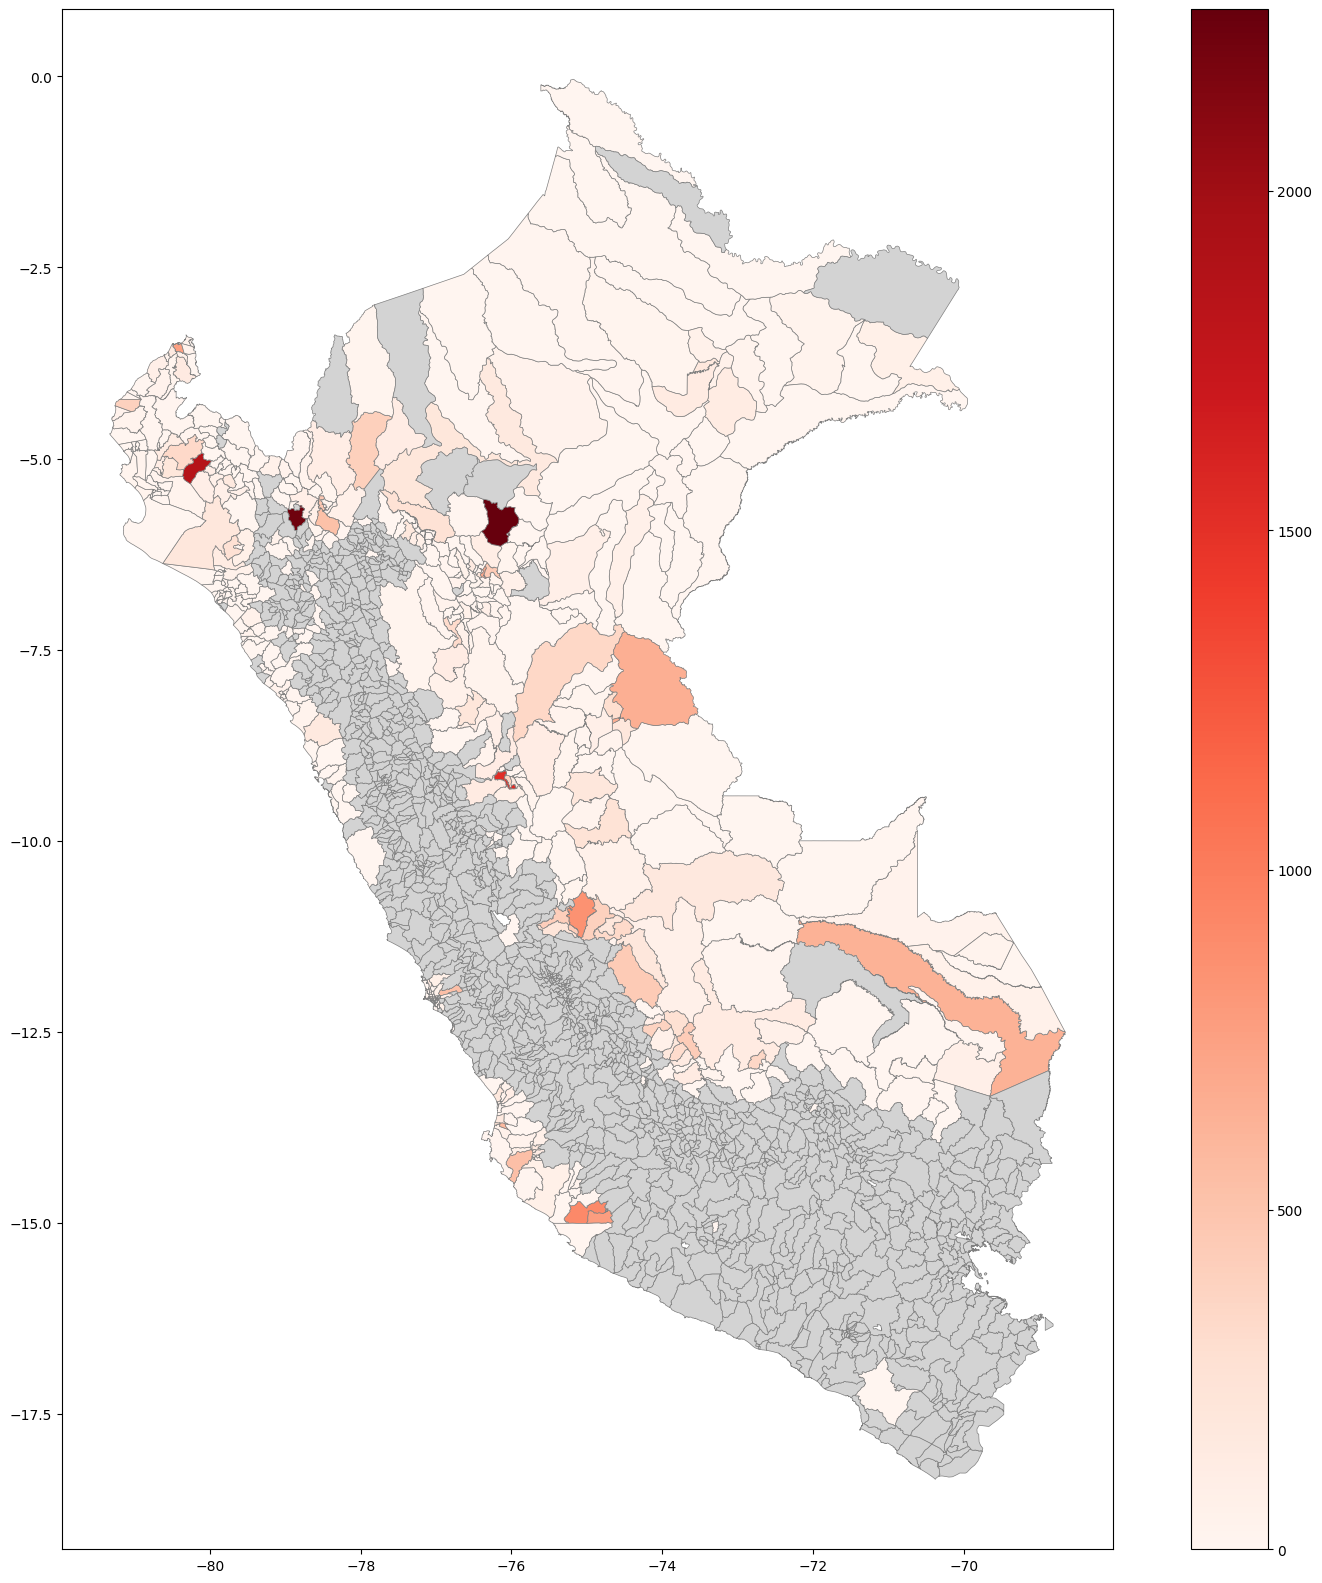

In [26]:
# Create a figure and axes object for the plot, setting the size to 20x20 inches
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the 'Casos' column from the 'datos_map1' GeoDataFrame on the axes, 
# using a 'Reds' colormap, gray borders, and a line width of 0.5. 
# The legend is also enabled.
data_map1.plot(column    ='Casos', 
                cmap      ='Reds', 
                edgecolor ='gray', 
                linewidth =0.5,
                ax        =ax,
                legend    =True)

# Create a mask to identify rows where the 'Casos' column has missing values (NaN)
nan_mask = data_map1['Casos'].isna()

# Plot the areas with missing 'Casos' values (NaN) on the same axes,
# coloring them in light grey with gray borders and no legend
data_map1[nan_mask].plot(ax=ax, color='lightgrey', edgecolor='gray', linewidth=0.5, legend=False)

# Display the plot
plt.show()

## Question 4

Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [27]:
# Group 'data_2021' by 'cod_pro', sum the 'Casos' for each group, and reset the index.
# Display the resulting DataFrame
data_2021_provincial = data_2021.groupby('cod_pro')['Casos'].sum().reset_index()
data_2021_provincial

,cod_pro,Casos
0,0101,0
1,0102,676
2,0103,0
3,0104,435
4,0107,719
...,...,...
87,2403,72
88,2501,1241
89,2502,179
90,2503,193


In [28]:
# Extracts the first 4 characters of 'UBIGEO' and creates the 'UBIGEO_Prov' column with the province code.
shpf1['UBIGEO_Prov'] = shpf1['UBIGEO'].str[:4]
# Perform a spatial dissolve operation based on the new provincial code. This combines polygons that belong to the same province
shpf1_provincial = shpf1.dissolve(by='UBIGEO_Prov')

In [29]:
# Show the first 3 rows of the provincial GeoDataFrame
shpf1_provincial.head(3)

,geometry,UBIGEO
UBIGEO_Prov,,
0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",010106
0102,"POLYGON ((-78.3262 -5.56382, -78.32625 -5.5652...",010204
0103,"POLYGON ((-77.9378 -6.03777, -77.93781 -6.0377...",010311


In [30]:
# Show the first 3 rows of the 2021 provincial data DataFrame
data_2021_provincial.head(3)

,cod_pro,Casos
0,0101,0
1,0102,676
2,0103,0


<Axes: >

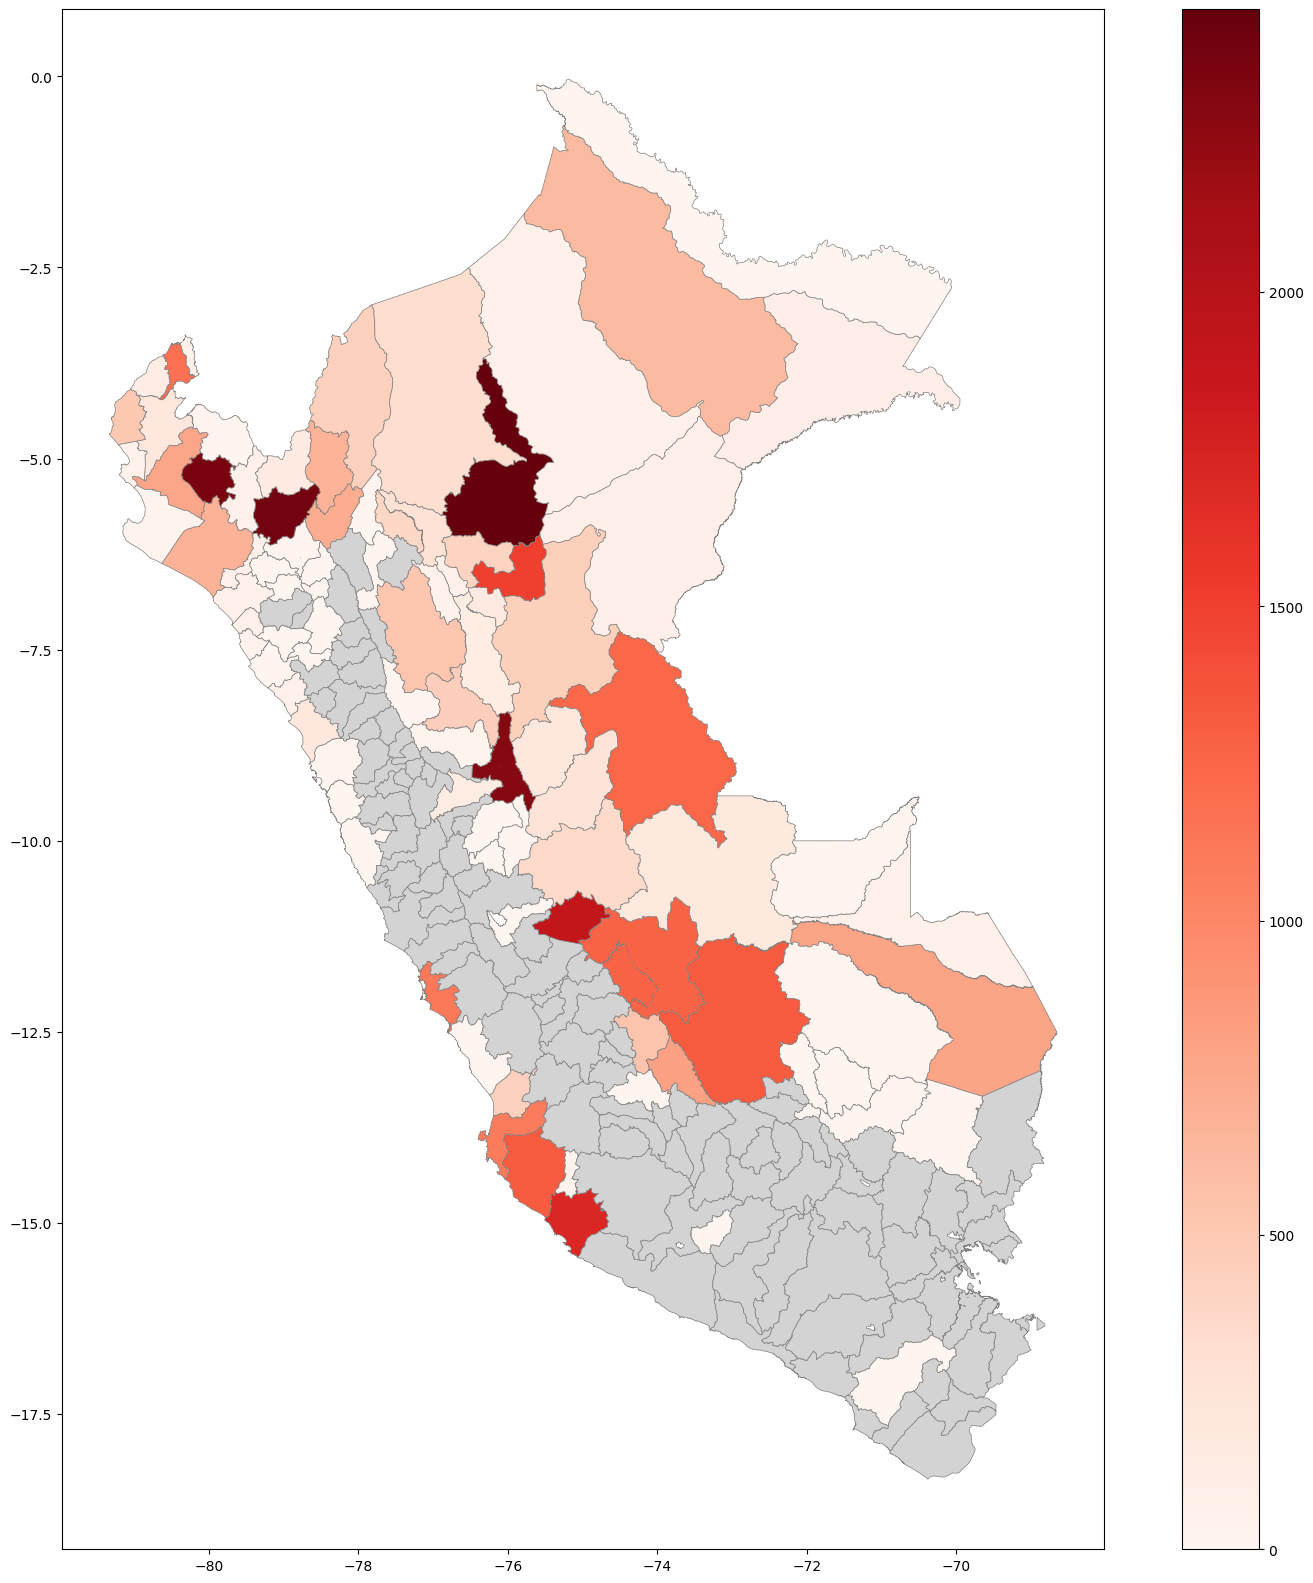

In [31]:
data_map_prov = pd.merge(shpf1_provincial, data_2021_provincial, how="left", left_on="UBIGEO_Prov", right_on="cod_pro")
# Define the color for NaN values
color_nan = 'lightgrey'

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot with the desired colormap
data_map_prov.plot(column='Casos', cmap='Reds', 
                    edgecolor='gray', 
                    linewidth=0.5,
                    ax=ax,
                    legend=True)

# Plot the NaN values with the specified color
nan_mask = data_map_prov['Casos'].isna()
data_map_prov[nan_mask].plot(ax=ax, color=color_nan, edgecolor='gray', linewidth=0.5, legend=False)

## Question 5

Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [37]:
# Aggregate the data by department and year
data_dep = data.groupby(['cod_dep', 'Año'], as_index=False)['Casos'].sum()
data_dep

,cod_dep,Año,Casos
0,01,2015,37
1,01,2016,90
2,01,2017,93
3,01,2018,109
4,01,2019,164
...,...,...,...
142,25,2017,779
143,25,2018,317
144,25,2019,214
145,25,2020,10934


In [61]:
# Upload shape file at district level
map = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [58]:
# Counting the number of unique years present in the 'Año' column of the data_dep DataFrame.
data_dep['Año'].value_counts().size

7

In [62]:
# Aggregating the geometries and data by 'IDPROV' (likely the province ID). This combines
# all geometries that belong to the same province into a single geometry.
map_dep = map.dissolve(by='IDPROV')
# Further aggregating the geometries and data by 'CCDD' (likely the department ID). This
# step merges all geometries within the same department into one.
map_dep = map_dep.dissolve(by='CCDD')
map_dep

,geometry,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
CCDD,,,,,,,,,,,,,,
01,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
02,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",ANCASH,01,HUARAZ,05,INDEPENDENCIA,CENTENARIO,020105,020105,136,INDEPENDENCIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
03,"POLYGON ((-72.35713 -14.43812, -72.3574 -14.43...",APURIMAC,01,ABANCAY,08,SAN PEDRO DE CACHORA,CACHORA,030108,030108,52,SAN PEDRO DE CACHORA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
04,"POLYGON ((-71.3241 -17.06147, -71.32365 -17.06...",AREQUIPA,01,AREQUIPA,15,QUEQUEÑA,QUEQUEÑA,040115,040115,6,QUEQUEÑA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
05,"POLYGON ((-74.50249 -15.16092, -74.50336 -15.1...",AYACUCHO,01,HUAMANGA,16,ANDRES AVELINO CACERES DORREGARAY,JARDIN,050116,050116,10,ANDRES AVELINO CACERES DORREGARAY,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
06,"POLYGON ((-78.81352 -7.42584, -78.81432 -7.425...",CAJAMARCA,01,CAJAMARCA,01,CAJAMARCA,CAJAMARCA,060101,060101,126,CAJAMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0...",CALLAO,01,CALLAO,07,MI PERU,MI PERU,070107,070107,1,MI PERU,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...",CUSCO,01,CUSCO,08,WANCHAQ,WANCHAQ,080108,080108,1,WANCHAQ,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
09,"POLYGON ((-75.25853 -14.04317, -75.26012 -14.0...",HUANCAVELICA,01,HUANCAVELICA,06,HUACHOCOLPA,HUACHOCOLPA,090106,090106,70,HUACHOCOLPA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


In [63]:
map_dep = pd.merge(map_dep, data_dep, left_on='CCDD', right_on='cod_dep', how='left')

,geometry,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,cod_dep,Año,Casos
0,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,01,2015.0,37
1,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,01,2016.0,90
2,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,01,2017.0,93
3,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,01,2018.0,109
4,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,01,2019.0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"POLYGON ((-72.17858 -11.01843, -72.17786 -11.0...",UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,25,2017.0,779
147,"POLYGON ((-72.17858 -11.01843, -72.17786 -11.0...",UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,25,2018.0,317
148,"POLYGON ((-72.17858 -11.01843, -72.17786 -11.0...",UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,25,2019.0,214
149,"POLYGON ((-72.17858 -11.01843, -72.17786 -11.0...",UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,25,2020.0,10934


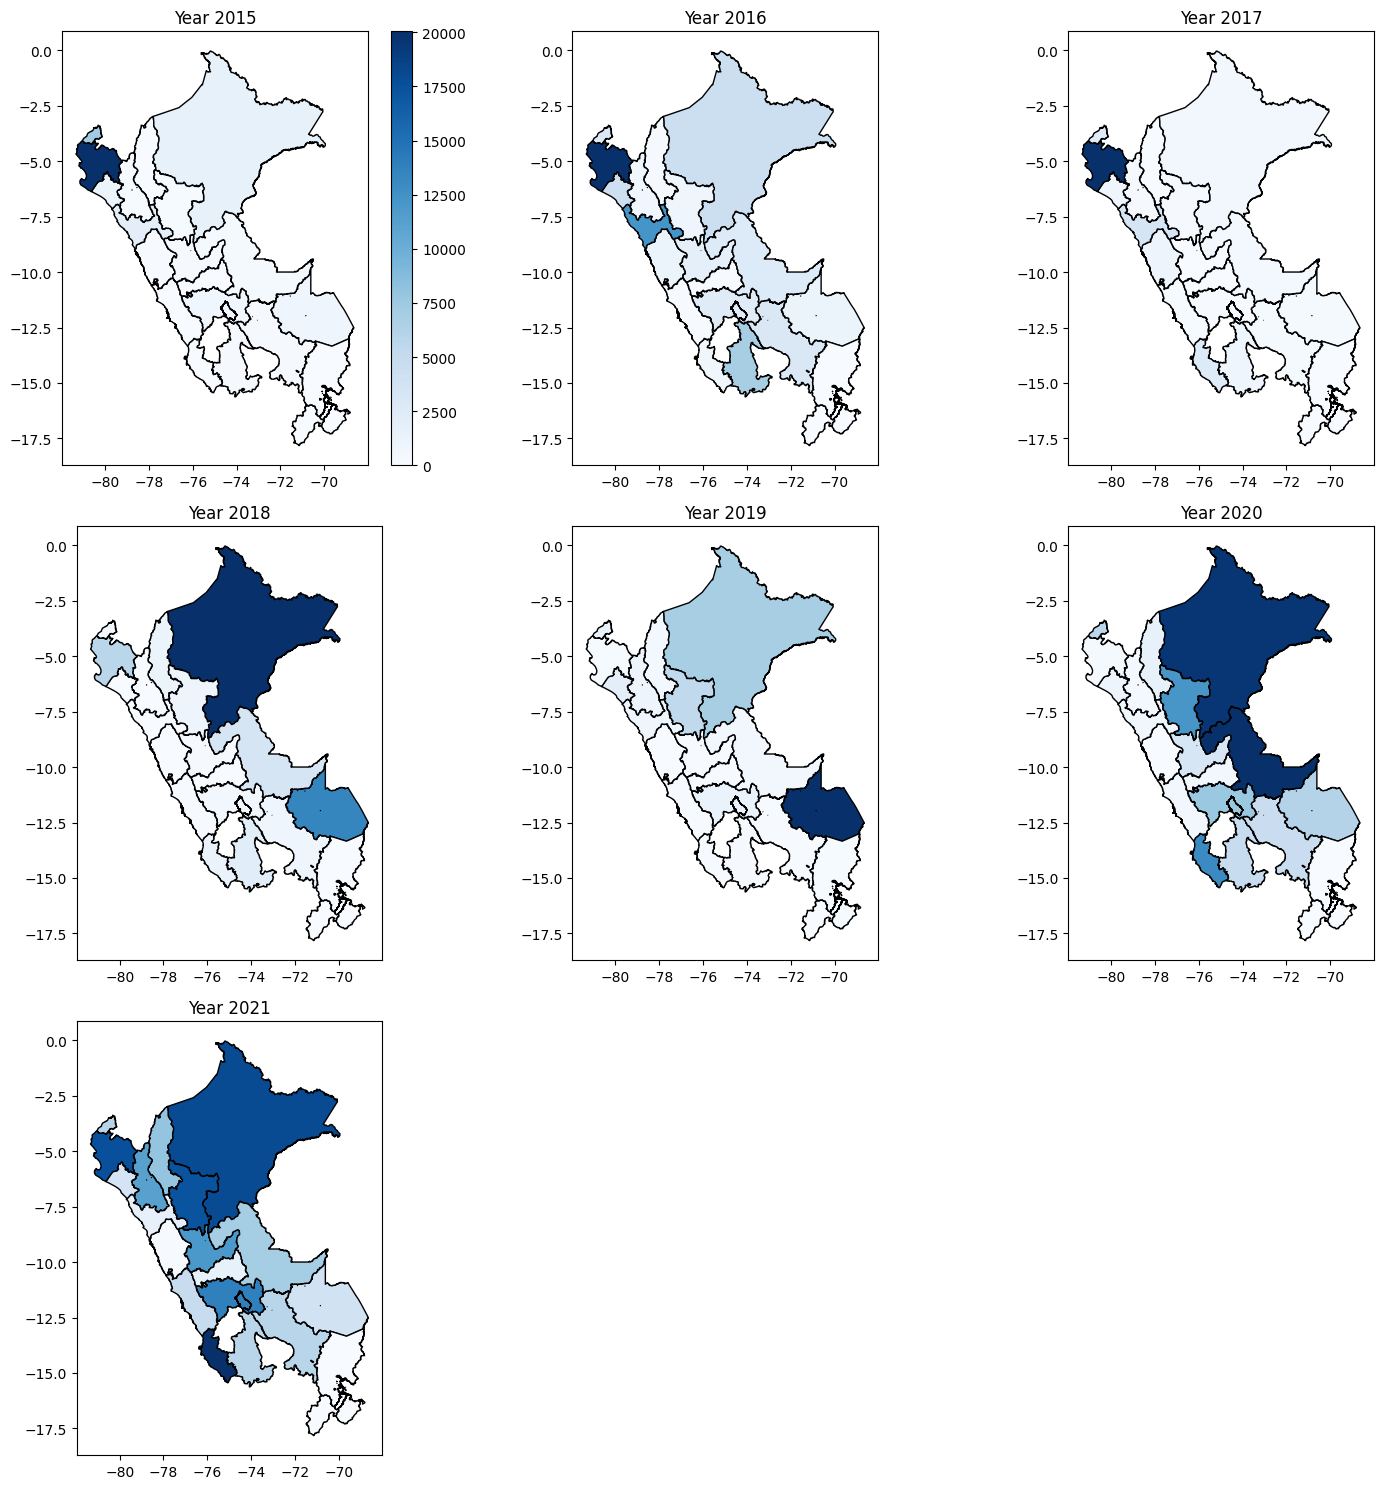

In [66]:
# Assuming map_dep contains district-level data
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

x = 0
for i in range(3):
    for j in range(3):
        if x < 7:
            ax = axis[i][j]
            año = map_dep['Año'].unique()[x]
            # Filter by year and plot by district (make sure your GeoDataFrame contains district-level data)
            map_dep_año = map_dep[map_dep['Año'] == año]
    
            # Check if the GeoDataFrame for the year is empty
            if map_dep_año.empty:
                ax.set_title(f"Year {int(año)}: No data", fontsize=10)
                ax.axis("off")  # Turn off axis if no data
            else:
                # Plot the map at district level
                map_dep_año.plot(column='Casos', 
                                 cmap='Blues', 
                                 linestyle='-', 
                                 edgecolor='black', 
                                 legend=(x == 0),  # Show legend only for the first plot
                                 missing_kwds=dict(color="#DADADB"),
                                 ax=ax)
                ax.set_title(f"Year {int(año)}", fontsize=12)
            
            x += 1
        else:
            fig.delaxes(axis[i, j])  # Remove unused subplots if no more years to plot

# Adjust layout
plt.tight_layout()
plt.show()




## Question 6

Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.